# Ecommerce Analytics: Customer Segmentation using RFM approach.


#RFM (Recency, Frequency, Monetary) 

RFM analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service.

# What is RFM?

Behavioral segmentation by 3 important features:
- Recency — number of days since the last purchase

- Frequency — number of transactions made over a given period

- Monetary — amount spent over a given period of time

We will then have to group these features by:
- Percentiles or quantiles
- Pareto Rule — 80/20
- Business Acumen

We will be implementing the percentile grouping for our approach.

# Loading Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/EcommerceAnalytics/Ecommerce Analytics/E-com_Data.xlsx")

In [ ]:
df.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
print("The Dimension of Data Set is {}".format(df.shape))

The Dimension of Data Set is (537979, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [ ]:
df.isnull().sum()

CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
Cancelled_status     529634
Reason of return     537976
Sold as set          537979
dtype: int64

In [ ]:
df.isnull().mean()

CustomerID           0.248690
Item Code            0.000000
InvoieNo             0.000000
Date of purchase     0.000000
Quantity             0.000000
Time                 0.000000
price per Unit       0.000000
Price                0.000000
Shipping Location    0.000000
Cancelled_status     0.984488
Reason of return     0.999994
Sold as set          1.000000
dtype: float64

In [ ]:
df.describe(include="float")

,CustomerID,price per Unit,Price,Cancelled_status,Sold as set
count,404189.000000,537979.000000,537979.000000,8345.0,0.0
mean,2181.909035,378.339062,2161.414593,1.0,NaN
std,1252.681881,440.048823,4538.487177,0.0,NaN
min,2.000000,1.000000,-10152.000000,1.0,NaN
25%,1207.000000,169.000000,451.000000,1.0,NaN
50%,2078.000000,261.000000,1194.000000,1.0,NaN
75%,3291.000000,456.000000,2232.000000,1.0,NaN
max,4372.000000,64973.000000,90400.000000,1.0,NaN


In [ ]:
df.describe(include="object")

,Item Code,Time,Shipping Location,Reason of return
count,537979,537979,537979,3
unique,4009,770,20,2
top,85123A,15:56:00,Location 36,Missing
freq,2298,2616,501963,2


In [ ]:
df.columns

Index(['CustomerID', 'Item Code', 'InvoieNo', 'Date of purchase', 'Quantity',
       'Time', 'price per Unit', 'Price', 'Shipping Location',
       'Cancelled_status', 'Reason of return', 'Sold as set'],
      dtype='object')

In [ ]:
col = ['CustomerID', 'Item_Code', 'InvoieNo', 'Date_of_purchase', 'Quantity',
       'Time', 'price_per_Unit', 'Price', 'Shipping_Location',
       'Cancelled_status', 'Reason_of_return', 'Sold_as_set']

In [ ]:
df.columns = col

In [ ]:
df.head()

,CustomerID,Item_Code,InvoieNo,Date_of_purchase,Quantity,Time,price_per_Unit,Price,Shipping_Location,Cancelled_status,Reason_of_return,Sold_as_set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [ ]:
df["Item_Code"].value_counts()

85123A    2298
14846     2162
85099B    2145
39989     1719
13148     1635
          ... 
46776e       1
84201C       1
84509F       1
14248        1
72803b       1
Name: Item_Code, Length: 4009, dtype: int64

In [ ]:
df["InvoieNo"].value_counts()

398649    1112
406283     748
406556     730
405793     720
383539     704
          ... 
371728       1
375826       1
367638       1
362005       1
402795       1
Name: InvoieNo, Length: 24928, dtype: int64

In [ ]:
df['year'] = pd.DatetimeIndex(df["Date_of_purchase"]).year

In [ ]:
df['month'] = pd.DatetimeIndex(df["Date_of_purchase"]).month

In [ ]:
df.head()

,CustomerID,Item_Code,InvoieNo,Date_of_purchase,Quantity,Time,price_per_Unit,Price,Shipping_Location,Cancelled_status,Reason_of_return,Sold_as_set,year,month
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN,2017,10
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN,2017,10
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN,2017,10
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN,2017,8
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN,2017,10


In [ ]:

data = df.copy()

#data.drop("InvoieNo",axis = 1, inplace = True)
#data.drop("Date_of_purchase",axis = 1, inplace = True)
data.drop("Time",axis = 1, inplace = True)
#data.drop("price_per_Unit",axis = 1, inplace = True)
data.drop("Cancelled_status",axis = 1, inplace = True)
data.drop("Reason_of_return",axis = 1, inplace = True)
data.drop("Sold_as_set",axis = 1, inplace = True)
data.drop("Shipping_Location",axis = 1, inplace = True)
data.drop("Item_Code",axis = 1, inplace = True)
data.drop("year",axis = 1, inplace = True)
data.drop("month",axis = 1, inplace = True)



In [ ]:
data.head()

,CustomerID,InvoieNo,Date_of_purchase,Quantity,price_per_Unit,Price
0,4355.0,398177,2017-10-29,6,321.0,1926.0
1,4352.0,394422,2017-10-05,2,870.0,1740.0
2,4352.0,394422,2017-10-12,2,933.0,1866.0
3,4352.0,388633,2017-08-22,3,623.0,1869.0
4,4352.0,394422,2017-10-10,2,944.0,1888.0


In [ ]:
#Removing Duplicates Values 

data.drop_duplicates(subset=None, keep='first', inplace=True)

In [ ]:
data.shape #approx 2000 duplicate record get removed

(536400, 6)

In [ ]:
data.isnull().sum()

CustomerID          132884
InvoieNo                 0
Date_of_purchase         0
Quantity                 0
price_per_Unit           0
Price                    0
dtype: int64

In [ ]:
data1 = data[data["CustomerID"].notnull()]

In [ ]:
data1.head()

,CustomerID,InvoieNo,Date_of_purchase,Quantity,price_per_Unit,Price
0,4355.0,398177,2017-10-29,6,321.0,1926.0
1,4352.0,394422,2017-10-05,2,870.0,1740.0
2,4352.0,394422,2017-10-12,2,933.0,1866.0
3,4352.0,388633,2017-08-22,3,623.0,1869.0
4,4352.0,394422,2017-10-10,2,944.0,1888.0


In [ ]:
data1.to_csv("Ecommerce_data.csv")

In [ ]:
from google.colab import files
files.download("Ecommerce_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data1.columns

Index(['CustomerID', 'InvoieNo', 'Date_of_purchase', 'Quantity',
       'price_per_Unit', 'Price'],
      dtype='object')

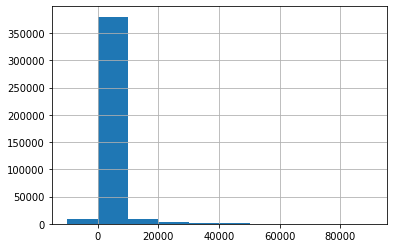

In [ ]:
data1["Price"].hist()

In [ ]:
data1.isnull().mean()

CustomerID          0.0
InvoieNo            0.0
Date_of_purchase    0.0
Quantity            0.0
price_per_Unit      0.0
Price               0.0
dtype: float64

In [ ]:
data1.head()

,CustomerID,InvoieNo,Date_of_purchase,Quantity,price_per_Unit,Price
0,4355.0,398177,2017-10-29,6,321.0,1926.0
1,4352.0,394422,2017-10-05,2,870.0,1740.0
2,4352.0,394422,2017-10-12,2,933.0,1866.0
3,4352.0,388633,2017-08-22,3,623.0,1869.0
4,4352.0,394422,2017-10-10,2,944.0,1888.0


In [ ]:
data1.shape

(403516, 6)

In [ ]:
data1['Date_of_purchase'].min(),data1['Date_of_purchase'].max()

(Timestamp('2016-12-02 00:00:00'), Timestamp('2017-12-19 00:00:00'))

In [ ]:
data1['Date_of_purchase'].min(),data1['Date_of_purchase'].max()
PRESENT = dt.datetime(2018,1,5)

In [ ]:
rfm = data1.groupby("CustomerID").agg({"Date_of_purchase": lambda date: (PRESENT - date.max()).days, 'InvoieNo': lambda num: len(num),'Price': lambda price: price.sum()})


rfm.columns
# Change the name of columns
rfm.columns=['Recency','Frequency','Monetary']
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,20,182,553704.0
3.0,93,27,257404.0
4.0,35,72,176613.0
5.0,327,16,41976.0
6.0,53,84,151822.0


In [ ]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
2.0,20,182,553704.0
3.0,93,27,257404.0
4.0,35,72,176613.0
5.0,327,16,41976.0
6.0,53,84,151822.0
...,...,...,...
4368.0,294,10,20480.0
4369.0,197,7,10774.0
4370.0,25,13,24962.0


Customers with lowest recency value and highest frequency & monetary to be considered as Best customer . We have used Quantile statistical techniques to assigning the score. In Quantiles techniques we have we can make 4 equal parts based on available values.

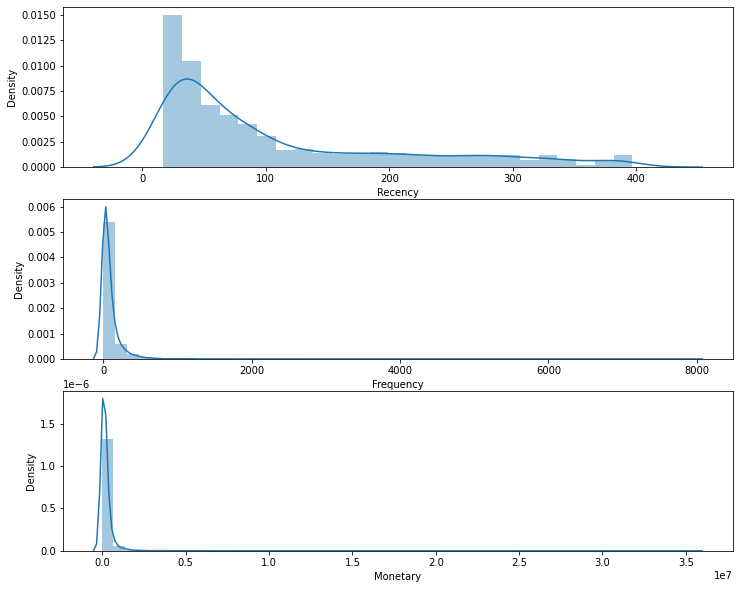

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(rfm["Recency"])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(rfm["Frequency"])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(rfm["Monetary"])
# Show the plot
plt.show()

This plot provides us with some very interesting insights and how skewed our data is. The important thing to take note here is that we will be grouping these values in quantiles. However, when we examine our customer segmentation using K-Means in the next, it will be very important to ensure that we scale our data to center the mean and standard deviations. More on that next time. Let us proceed with the .qcut() for our RFM.

In [ ]:
#computing the Quantile of RFM value for segmentation

rfm['R'] = pd.qcut(rfm['Recency'], 4, ['1','2','3','4'])
rfm['F'] = pd.qcut(rfm['Frequency'], 4, ['4','3','2','1'])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, ['4','3','2','1'])
rfm.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,20,182,553704.0,1,1,1
3.0,93,27,257404.0,3,3,1
4.0,35,72,176613.0,2,2,2
5.0,327,16,41976.0,4,4,3
6.0,53,84,151822.0,2,2,2


Now we can combine all three Quantile score in a single column, and it will help us to create the logic base Customer segmentation as per the business criteria.

111 will be considered as the best performing customer as they have lowest recency and highest frequency and monetary. 444 will be the worst segment.

In [ ]:
#https://www.analyticseducator.com/Blog/Customer_Segmentation_Using_RFM_with_Python.html

#https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [ ]:
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
2.0,20,182,553704.0,1,1,1
3.0,93,27,257404.0,3,3,1
4.0,35,72,176613.0,2,2,2
5.0,327,16,41976.0,4,4,3
6.0,53,84,151822.0,2,2,2
...,...,...,...,...,...,...
4368.0,294,10,20480.0,4,4,4
4369.0,197,7,10774.0,4,4,4
4370.0,25,13,24962.0,1,4,4


In [ ]:
rfm.R.value_counts()

1    1123
4    1085
3    1084
2    1057
Name: R, dtype: int64

In [ ]:
rfm.F.value_counts()

4    1102
3    1097
1    1085
2    1065
Name: F, dtype: int64

In [ ]:
rfm.M.value_counts()

4    1088
1    1087
2    1087
3    1087
Name: M, dtype: int64

Text(0.5, 1.0, 'Monetary')

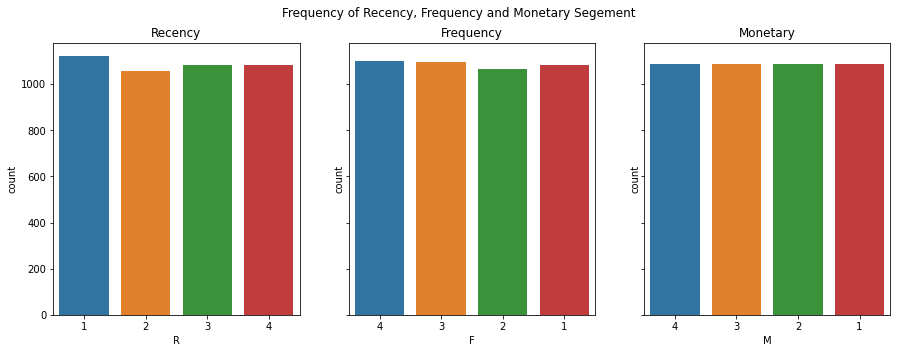

In [ ]:
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Frequency of Recency, Frequency and Monetary Segement')

# recency
sns.countplot(rfm["R"], ax=axes[0])
axes[0].set_title("Recency")

# frequency
sns.countplot(rfm["F"], ax=axes[1],)
axes[1].set_title("Frequency")

# monetary
sns.countplot(rfm["M"], ax=axes[2])
axes[2].set_title("Monetary")

In [ ]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment_Concat'] = rfm.apply(join_rfm, axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat
CustomerID,,,,,,,
2.0,20,182,553704.0,1,1,1,111
3.0,93,27,257404.0,3,3,1,331
4.0,35,72,176613.0,2,2,2,222
5.0,327,16,41976.0,4,4,3,443
6.0,53,84,151822.0,2,2,2,222


From the output, you can see that we have our concatenated segments ready to be used for our segmentation, but wait, there is one issue…

In [ ]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(rfm_count_unique.sum())

61


Having 62 different segments using the concatenate method quickly becomes unwieldy for any practical use. We will need a more concise way to define our segments.

# Summing the Score
One of the most straightforward methods is to sum our scores to a single number and define RFM levels for each score range.

In [ ]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].apply(pd.to_numeric, errors='coerce').sum(axis=1)
print(rfm['RFM_Score'].head())

CustomerID
2.0     3
3.0     7
4.0     6
5.0    11
6.0     6
Name: RFM_Score, dtype: int64


We can get creative and hypothesize about what each score range entails, but for this exercise I will take inspiration from some common segment names.

In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] == 3:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
2.0,20,182,553704.0,1,1,1,111,3,Can't Loose Them
3.0,93,27,257404.0,3,3,1,331,7,Promising
4.0,35,72,176613.0,2,2,2,222,6,Potential
5.0,327,16,41976.0,4,4,3,443,11,Require Activation
6.0,53,84,151822.0,2,2,2,222,6,Potential


In [ ]:
#Finally, we can then group our customers by their RFM level.

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency   Monetary      
                      mean      mean       mean count
RFM_Level                                            
Can't Loose Them      23.7     370.6  1033220.7   471
Champions             37.7     189.2   454344.1   372
Loyal                 48.6     114.7   247332.9   439
Needs Attention       97.3      39.6    92082.5   447
Potential             62.7      79.2   171519.2   404
Promising             78.9      56.9   120675.6   460
Require Activation   184.4      18.4    39175.5  1756


#From here, we can see that a large percentage (~60%) of our customers are in the top tier RFM levels. The store must be doing something right to be maintaining their loyalty!

##The other 40% will need some work. Let’s explore using some ads to re-target them:

- Can't loose them - Store regular customers, whome store never want to loose.

- Potential — high potential to enter our loyal customer segments, why not throw in some freebies on their next purchase to show that you value them!

- Promising — showing promising signs with quantity and value of their purchase but it has been a while since they last bought sometime from you. Let’s target them with their wishlist items and a limited time offer discount.

- Needs Attention — made some initial purchase but have not seen them since. Was it a bad customer experience? Or product-market fit? Let’s spend some resource build our brand awareness with them.

- Require Activation — Poorest performers of our RFM model. They might have went with our competitors for now and will require a different activation strategy to win them back.

In [ ]:
# But before we end, let’s create a nice visualization for our data.

!pip install squarify

In [ ]:
import squarify

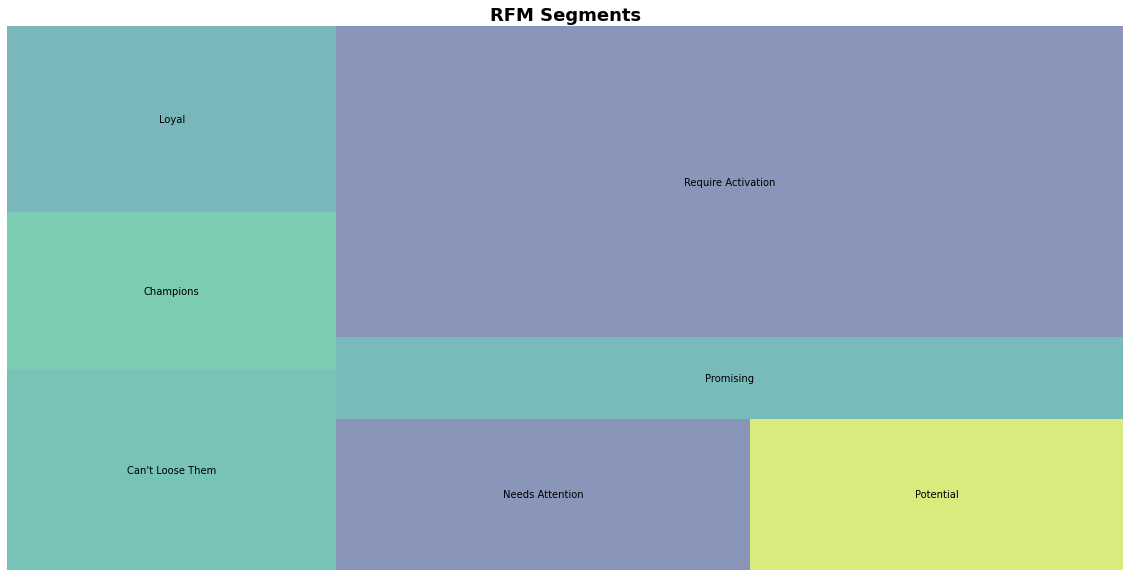

In [ ]:
count = [471,372,439,447,404,460,1756]

plt.figure(figsize=(20,10))

squarify.plot(count, label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()


In [ ]:
rfm

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
CustomerID,,,,,,,,,
2.0,20,182,553704.0,1,1,1,111,3,Can't Loose Them
3.0,93,27,257404.0,3,3,1,331,7,Promising
4.0,35,72,176613.0,2,2,2,222,6,Potential
5.0,327,16,41976.0,4,4,3,443,11,Require Activation
6.0,53,84,151822.0,2,2,2,222,6,Potential
...,...,...,...,...,...,...,...,...,...
4368.0,294,10,20480.0,4,4,4,444,12,Require Activation
4369.0,197,7,10774.0,4,4,4,444,12,Require Activation
4370.0,25,13,24962.0,1,4,4,144,9,Require Activation


In [ ]:
rfm.to_csv("Ecommerece_RFM.csv")

In [ ]:
from google.colab import files
files.download('Ecommerece_RFM.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
rfm["RFM_Level"].value_counts()

Require Activation    1756
Can't Loose Them       471
Promising              460
Needs Attention        447
Loyal                  439
Potential              404
Champions              372
Name: RFM_Level, dtype: int64

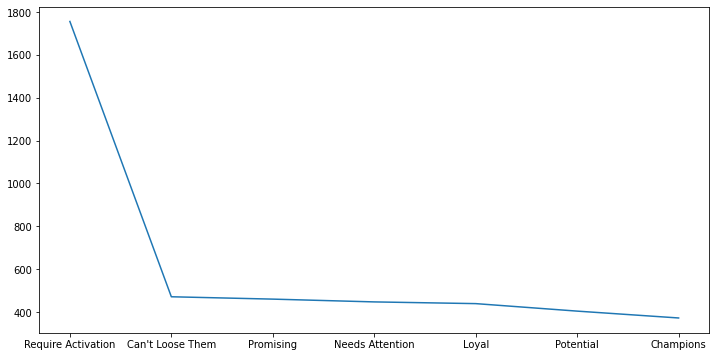

In [ ]:
plt.figure(figsize=(12,6))
rfm["RFM_Level"].value_counts().plot()
plt.show()

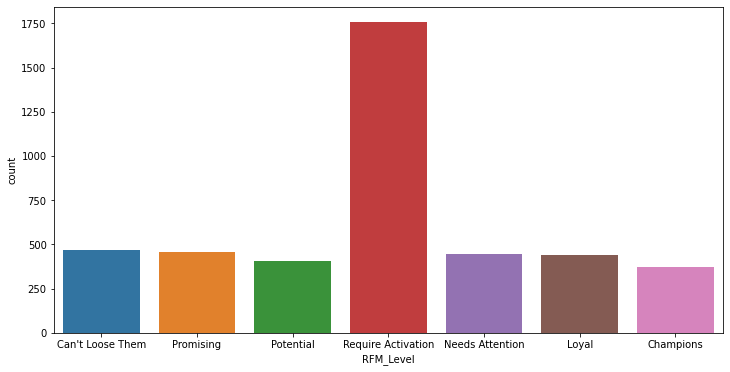

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(rfm["RFM_Level"])

# Classification of 4349 customers using Kmeans clustering approach!!!

In [ ]:
cls_data = rfm.copy()

In [ ]:
cls_data.columns

Index(['Recency', 'Frequency', 'Monetary', 'R', 'F', 'M', 'RFM_Segment_Concat',
       'RFM_Score', 'RFM_Level'],
      dtype='object')

In [ ]:
cls_data = cls_data.iloc[:,0:3]

In [ ]:
cls_data

,Recency,Frequency,Monetary
CustomerID,,,
2.0,20,182,553704.0
3.0,93,27,257404.0
4.0,35,72,176613.0
5.0,327,16,41976.0
6.0,53,84,151822.0
...,...,...,...
4368.0,294,10,20480.0
4369.0,197,7,10774.0
4370.0,25,13,24962.0


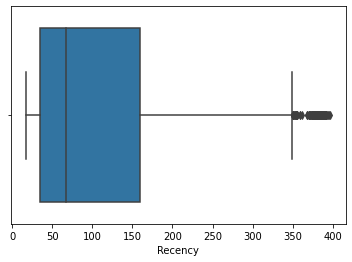

In [ ]:
sns.boxplot(cls_data['Recency'])
plt.show()

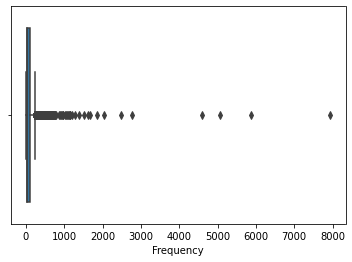

In [ ]:
sns.boxplot(cls_data['Frequency'])
plt.show()

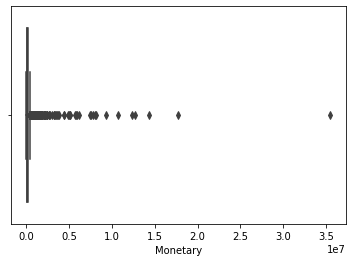

In [ ]:
sns.boxplot(cls_data['Monetary'])
plt.show()

# Data Processing
A common practice employed prior to any analysis using distance calculations is to normalize or z-score standardize the features so that each utilizes the same range. By doing so, you can avoid a problem in which some features come to dominate solely because they have a larger range of values than the others.

The process of z-score standardization rescales features so that they have a mean of zero and a standard deviation of one. This transformation changes the interpretation of the data in a way that may be useful here.

In [ ]:
names = cls_data.columns[0:3]
scaled_feature = cls_data.copy()

In [ ]:
features = scaled_feature[names]
features.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,20,182,553704.0
3.0,93,27,257404.0
4.0,35,72,176613.0
5.0,327,16,41976.0
6.0,53,84,151822.0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(features.values)

In [ ]:
features = scaler.transform(features.values)

In [ ]:
scaled_feature[names] = features
scaled_feature.head()

,Recency,Frequency,Monetary
CustomerID,,,
2.0,-0.886877,0.385626,0.378333
3.0,-0.161877,-0.284341,0.032341
4.0,-0.737904,-0.089834,-0.061999
5.0,2.162093,-0.331887,-0.219216
6.0,-0.559137,-0.037966,-0.090948


# K-means Algorithm

In [ ]:
from sklearn.cluster import KMeans

# Determining Optimal Clusters
While working with clusters, you need to specify the number of clusters to use. You would like to utilize the optimal number of clusters. To help you in determining the optimal clusters, there are three popular methods –

- Elbow method

- Silhouette method

- Gap statistic

# Elbow Method

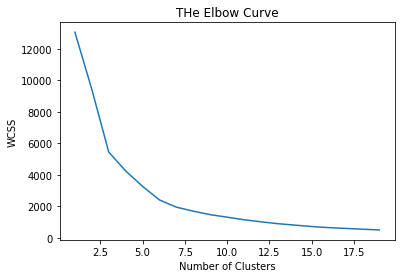

In [ ]:
# Creating a function with KMeans to plot "The Elbow Curve"

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0)
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS") #WCSS stands for total within-cluster sum of sqaure
plt.show()

The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters. Our Elbow point is around cluster size of 5. 

# Average Silhouette Method

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Instantiate the KMeans models

for i in [2,3,4,5,6]:
  km = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=100, random_state=42)

  # Fit the KMeans model
  km.fit_predict(scaled_feature)

  # Calculate Silhoutte Score
  score = silhouette_score(scaled_feature, km.labels_, metric='euclidean')

  # Print the score
  print('Silhouetter Score for {} clusters is {}'.format(i,score))


Silhouetter Score for 2 clusters is 0.9260547657582795
Silhouetter Score for 3 clusters is 0.5960624833352669
Silhouetter Score for 4 clusters is 0.5974472542255794
Silhouetter Score for 5 clusters is 0.5968411173743919
Silhouetter Score for 6 clusters is 0.5857374804091415


# Fit K-Means clustering for k=5

In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
len(kmeans.labels_)

4349

In [ ]:
kmeans.fit_predict(scaled_feature)

array([0, 0, 0, ..., 0, 3, 0], dtype=int32)

In [ ]:
cls_data['cluster'] = kmeans.labels_

In [ ]:
cls_data.head()

,Recency,Frequency,Monetary,cluster
CustomerID,,,,
2.0,20,182,553704.0,0
3.0,93,27,257404.0,0
4.0,35,72,176613.0,0
5.0,327,16,41976.0,1
6.0,53,84,151822.0,0


# Interpreting Clustering Results

In [ ]:
cls_data["cluster"].value_counts()

0    2949
1    1063
3     322
2      11
4       4
Name: cluster, dtype: int64

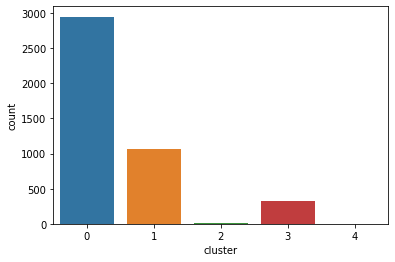

In [ ]:
sns.countplot(cls_data["cluster"])

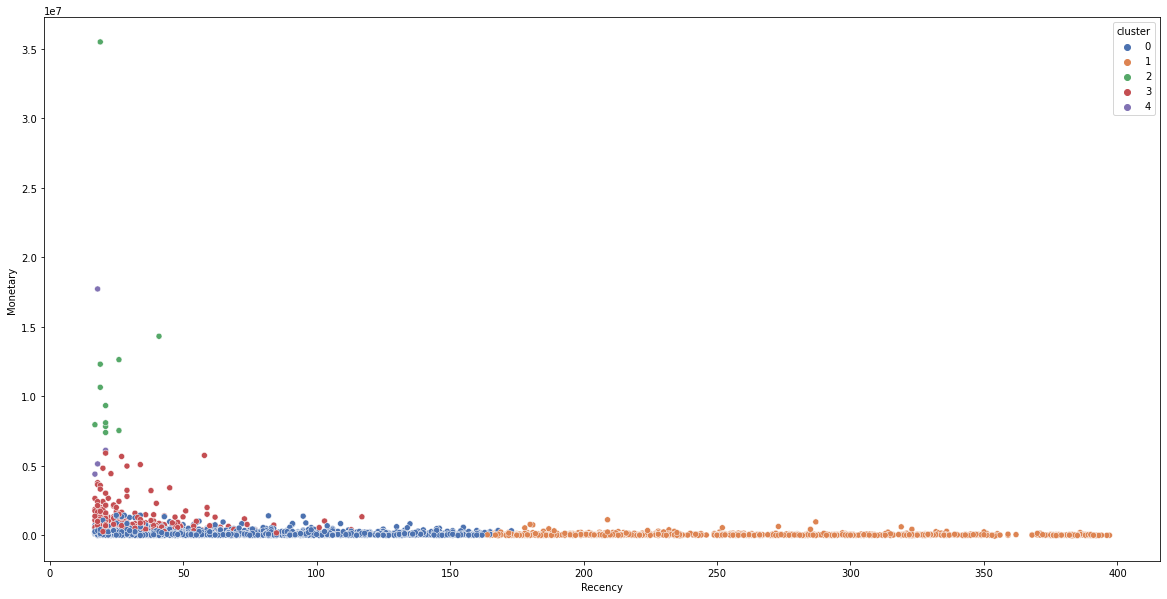

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=cls_data["Recency"], y=cls_data["Monetary"], hue=cls_data["cluster"], palette="deep", sizes=(20, 200), legend="full")
plt.show()

### Cluster 1 has those customers who have high recency rate and low monetary value. Same way we can see other clusters metrics also with this chart.

### like cluster 3, 2 and 0 have low recency rate in comparison to cluster 1 and cluster 4.

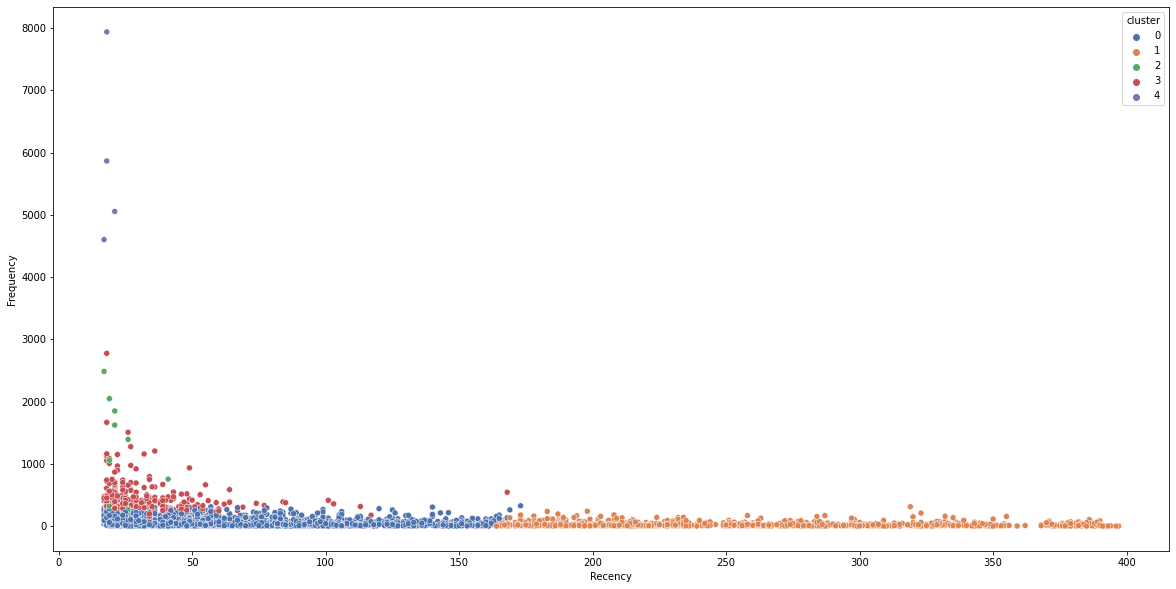

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=cls_data["Recency"], y=cls_data["Frequency"], hue=cls_data["cluster"], palette="deep", sizes=(20, 200), legend="full")
plt.show()